In [1]:
import pandas as pd

In [2]:
data = pd.read_pickle('data/data_pickle')
rmf_data = pd.read_pickle('data/rmf_data_pickle')

In [3]:
df = data.copy()

In [4]:
by = 'mp_sup_key'

In [5]:
rmf_data.drop(['rfm_scores_key', 'supplier_key'], inplace=True, axis=1)

In [6]:
rmf_data.head(3)

,mp_sup_key,report_date,r_score,f_score90,f_score180,m_score90,m_score180
0,5b98c07e-9454-4253-abbb-5813cbbeef7e,2016-05-29,1,2,1,4,1
1,5b98c07e-9454-4253-abbb-5813cbbeef7e,2016-05-31,5,2,1,4,1
2,5b98c07e-9454-4253-abbb-5813cbbeef7e,2016-06-02,1,2,1,4,1


In [7]:
df['account_status'] = df.account_status.str.lower()
account_mapping = {'ok' : 0, 'at risk' :1, 'suspended' : 2}
df['status'] = df.account_status.map(account_mapping)
df['date'] = pd.to_datetime(df.date)

In [8]:
rmf_data.rename(columns={'report_date': 'date'}, inplace=True)
rmf_data['date'] = pd.to_datetime(rmf_data.date)


In [9]:
df = pd.merge(df, rmf_data, how='left')

In [10]:
df.sort_values(['mp_sup_key', 'date'], inplace=True)
df.set_index('date', inplace=True)

In [11]:
df.head()

,mp_sup_key,supplier_key,account_status,order_defect_rate,late_shipment_rate,cancellation_rate,valid_tracking_rate_all_cat,late_responses,return_dissatisfaction_rate,customer_service_dissatisfaction_rate_beta,...,reserve,other,has_active_loan,number_of_loans,status,r_score,f_score90,f_score180,m_score90,m_score180
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,000b068c-69b3-426e-a506-9914eaf8710b,2b2067cd-1be4-4002-bf29-b86715fa5959,ok,0.26,0.25,0.74,99.09,32.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,3.0,5.0,5.0,3.0,3.0
2018-01-03,000b068c-69b3-426e-a506-9914eaf8710b,2b2067cd-1be4-4002-bf29-b86715fa5959,ok,0.26,0.25,0.74,99.04,34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,5.0,5.0,5.0,3.0,3.0
2018-01-04,000b068c-69b3-426e-a506-9914eaf8710b,2b2067cd-1be4-4002-bf29-b86715fa5959,ok,0.26,0.24,0.73,99.04,34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,5.0,5.0,5.0,3.0,3.0
2018-01-05,000b068c-69b3-426e-a506-9914eaf8710b,2b2067cd-1be4-4002-bf29-b86715fa5959,ok,0.21,0.26,0.77,99.21,34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,5.0,5.0,5.0,3.0,3.0
2018-01-06,000b068c-69b3-426e-a506-9914eaf8710b,2b2067cd-1be4-4002-bf29-b86715fa5959,ok,0.21,0.00,0.79,99.21,33.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,3.0,5.0,5.0,3.0,3.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 920761 entries, 2018-01-02 to 2017-08-28
Data columns (total 31 columns):
mp_sup_key                                    920761 non-null object
supplier_key                                  920761 non-null object
account_status                                920761 non-null object
order_defect_rate                             920641 non-null float64
late_shipment_rate                            909934 non-null float64
cancellation_rate                             908186 non-null float64
valid_tracking_rate_all_cat                   707999 non-null float64
late_responses                                839808 non-null float64
return_dissatisfaction_rate                   556249 non-null float64
customer_service_dissatisfaction_rate_beta    750426 non-null float64
delivered_on_time                             793673 non-null float64
sales_7_days                                  788654 non-null float64
sales_30_days                       

In [13]:
cls_to_fill_values = ['r_score', 'f_score90', 'f_score180', 'm_score90', 'm_score180']

In [14]:
limit=30
df[cls_to_fill_values] = df.groupby(by)[cls_to_fill_values].transform(
        lambda x: x.fillna(method='ffill', limit=limit))
df[cls_to_fill_values] = df.groupby(by)[cls_to_fill_values].transform(
        lambda x: x.fillna(method='bfill', limit=limit))

In [15]:
df['at_risk_days'] = 0
df['ok_days'] = 0
df.loc[df.account_status == 'at risk', 'at_risk_days'] = 1
df.loc[df.account_status == 'ok', 'ok_days'] = 1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 920761 entries, 2018-01-02 to 2017-08-28
Data columns (total 33 columns):
mp_sup_key                                    920761 non-null object
supplier_key                                  920761 non-null object
account_status                                920761 non-null object
order_defect_rate                             920641 non-null float64
late_shipment_rate                            909934 non-null float64
cancellation_rate                             908186 non-null float64
valid_tracking_rate_all_cat                   707999 non-null float64
late_responses                                839808 non-null float64
return_dissatisfaction_rate                   556249 non-null float64
customer_service_dissatisfaction_rate_beta    750426 non-null float64
delivered_on_time                             793673 non-null float64
sales_7_days                                  788654 non-null float64
sales_30_days                       

In [24]:
median_columns = ['order_defect_rate', 'late_shipment_rate', 'cancellation_rate', 'valid_tracking_rate_all_cat', 'late_responses', 'fba',
                'return_dissatisfaction_rate', 'customer_service_dissatisfaction_rate_beta', 'delivered_on_time', 'sales_7_days', 'sales_30_days',
                 'r_score', 'f_score90', 'f_score180', 'm_score90', 'm_score180']

max_columns = ['order_defect_rate', 'late_shipment_rate', 'cancellation_rate', 'late_responses', 'return_dissatisfaction_rate', 
               'customer_service_dissatisfaction_rate_beta', 'sales_7_days', 'sales_30_days', 'products_removal', 'policy_warning', 
               'invoice_requested', 'intellectual_property', 'infringement', 'pricing_error', 'negative_customer_experiences', 
               'reserve', 'other', 'has_active_loan', 'number_of_loans', 'status'
               ]

min_columns = ['valid_tracking_rate_all_cat', 'delivered_on_time']

sum_columns = ['at_risk_days', 'ok_days']

std_columns = ['sales_7_days', 'sales_30_days']

In [25]:
period = '2W'

medians = df.groupby(by)[median_columns].resample(period).median()
maxs = df.groupby(by)[max_columns].resample(period).max()
mins = df.groupby(by)[min_columns].resample(period).min()
sums = df.groupby(by)[sum_columns].resample(period).sum()
stds = df.groupby(by)[std_columns].resample(period).std()

In [26]:
medians.columns = [col + '_median' for col in median_columns]
maxs.columns = [col + '_max' for col in max_columns]
mins.columns = [col + '_min' for col in min_columns]
sums.columns = [col + '_sum' for col in sum_columns]
stds.columns = [col + '_std' for col in std_columns]

In [37]:
df_metrics = pd.concat([medians, maxs, mins, sums, stds], axis=1)

In [29]:
future_status = df_metrics.groupby(by).status_max.shift(-1)
future_status.name = 'future_status'

In [38]:
df_metrics = pd.concat([df_metrics, future_status], axis=1)

In [39]:
df_metrics[['status_max', 'future_status']][:10]

status_max  future_status
mp_sup_key                           date                                 
000b068c-69b3-426e-a506-9914eaf8710b 2018-01-07         0.0            0.0
                                     2018-01-21         0.0            0.0
                                     2018-02-04         0.0            0.0
                                     2018-02-18         0.0            0.0
                                     2018-03-04         0.0            1.0
                                     2018-03-18         1.0            1.0
                                     2018-04-01         1.0            0.0
                                     2018-04-15         0.0            0.0
                                     2018-04-29         0.0            0.0
                                     2018-05-13         0.0            0.0

In [40]:
sharpe_ratio = df_metrics.sales_7_days_median.divide(df_metrics.sales_7_days_std)
sharpe_ratio.name = 'sharpe_ratio'

In [43]:
df_metrics = pd.concat([df_metrics, sharpe_ratio], axis=1)

In [ ]:
df_metrics.groupby(by)['sales_7_days_median'].pct_change()

In [62]:
grouper = df_metrics.groupby(by)
for col in ['sales_7_days_median', 'sales_30_days_median']:
    for period in [1,2]:
        col_name = str.replace(col, '_median', '') + '_change_from_' + str(period) + '_period'
        df_metrics[col_name] = grouper[col].pct_change(period)

In [65]:
df_metrics[['sales_7_days_median', 'sales_7_days_change_from_1_period']][:10]

sales_7_days_median  \
mp_sup_key                           date                              
000b068c-69b3-426e-a506-9914eaf8710b 2018-01-07              363.480   
                                     2018-01-21              375.645   
                                     2018-02-04              479.535   
                                     2018-02-18              420.090   
                                     2018-03-04              363.615   
                                     2018-03-18              265.855   
                                     2018-04-01              261.645   
                                     2018-04-15              231.520   
                                     2018-04-29              169.780   
                                     2018-05-13              257.965   

                                                 sales_7_days_change_from_1_period  
mp_sup_key                           date                                           
000b068c-69b3-426e-a506-9914eaf8710b 2018-01-07                                NaN  
                                     2018-01-21                           0.033468  
                                     2018-02-04                           0.276564  
                                     2018-02-18                          -0.123964  
                                     2018-03-04                          -0.134435  
                                     2018-03-18                          -0.268856  
                                     2018-04-01                          -0.015836  
                                     2018-04-15                          -0.115137  
                                     2018-04-29                          -0.266672  
                                     2018-05-13                           0.519407

In [9]:
df_metrics.groupby(by)['sales_7_days_median'].mean().describe()

count      4264.000000
mean       6339.153367
std       19830.062816
min           0.000000
25%         607.535685
50%        1655.339167
75%        4789.025718
max      472509.330000
Name: sales_7_days_median, dtype: float64

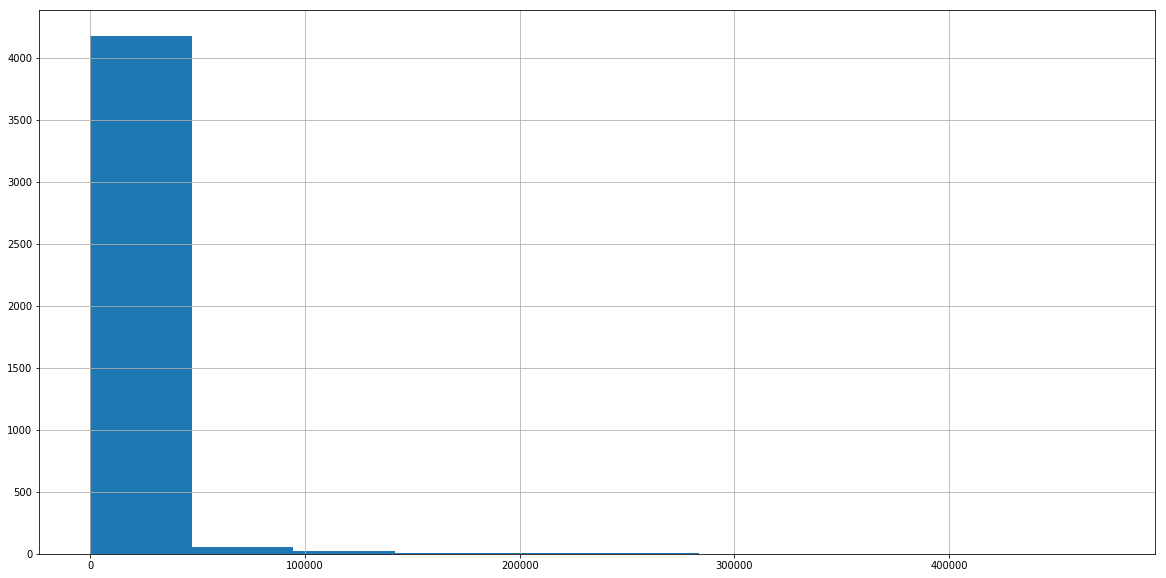

In [8]:
%matplotlib inline
df_metrics.groupby(by)['sales_7_days_median'].mean().hist(figsize = (20,10))

In [30]:
cut_levels = [-1, 1000, 5000, 50000, 10000000]
cut_labels = ['small', 'medium', 'large', 'very_large']

In [31]:
df_metrics['sales_tresh'] =  pd.cut(df_metrics.sales_7_days_median, cut_levels)
dummies = pd.get_dummies(df_metrics.sales_tresh)
dummies.columns = cut_labels
df_metrics = pd.concat([df_metrics, dummies], axis=1)

In [67]:
df_metrics.shape

(76074, 48)

In [35]:
df_metrics.reset_index().to_pickle('data/data_prepared')

In [34]:
df_metrics.reset_index().to_csv('data/data_prepared_csv')

### Notes

In [51]:
corr = df.corr()
corr[corr > 0.7]

,order_defect_rate,late_shipment_rate,cancellation_rate,valid_tracking_rate_all_cat,late_responses,return_dissatisfaction_rate,customer_service_dissatisfaction_rate_beta,delivered_on_time,sales_7_days,sales_30_days,...,has_active_loan,number_of_loans,status,r_score,f_score90,f_score180,m_score90,m_score180,at_risk_days,ok_days
order_defect_rate,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
late_shipment_rate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancellation_rate,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valid_tracking_rate_all_cat,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
late_responses,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return_dissatisfaction_rate,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_service_dissatisfaction_rate_beta,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivered_on_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_7_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.929316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.929316,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
